# Service Disruption

An assignment in boot camp curriculum. The purpuse of this assignment is to predict the fault severity of each cell disruption to help the company anticipate and prepare response teams accordingly to reduce the downtime of cell services. The challenge of this problem is to build a machine learning model for a data set that contains differet data tables. There are 5 separate csv files containing different details: location, ID, fault severity, event info, log info, and resource type. 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Ingestion

In [123]:
#Function for quick overview of data details

def data_overview(filename):
    data = pd.read_csv(filename)
    print(data.info())
    print('First 5 entry\n', data.head())
    print('Last 5 entry\n',data.tail())
    print('Statistics\n',data.describe())
    print('Null values\n',data.isnull().sum())
    print('Number of duplicates', data.duplicated().sum())
    return data

In [124]:
#Importing train data set and viewing data details
train = data_overview('train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB
None
First 5 entry
       id      location  fault_severity
0  14121  location 118               1
1   9320   location 91               0
2  14394  location 152               1
3   8218  location 931               1
4  14804  location 120               0
Last 5 entry
          id       location  fault_severity
7376    870   location 167               0
7377  18068   location 106               0
7378  14111  location 1086               2
7379  15189     location 7               0
7380  17067   location 885               0
Statistics
                  id  fault_severity
count   7381.000000      7381.00000
mean    9264

In [125]:
#Importing event type data set and viewing data details
event = data_overview('event_type.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31170 non-null  int64 
 1   event_type  31170 non-null  object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB
None
First 5 entry
      id     event_type
0  6597  event_type 11
1  8011  event_type 15
2  2597  event_type 15
3  5022  event_type 15
4  5022  event_type 11
Last 5 entry
          id     event_type
31165  3761  event_type 11
31166  8720  event_type 11
31167  6488  event_type 11
31168   878  event_type 11
31169  4464  event_type 11
Statistics
                  id
count  31170.000000
mean    9267.735258
std     5363.817181
min        1.000000
25%     4625.250000
50%     9287.500000
75%    13915.000000
max    18552.000000
Null values
 id            0
event_type    0
dtype: int64
Number of duplicates 0


In [126]:
#Importing log info data set and viewing data details
log = data_overview('log_feature.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           58671 non-null  int64 
 1   log_feature  58671 non-null  object
 2   volume       58671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB
None
First 5 entry
      id  log_feature  volume
0  6597   feature 68       6
1  8011   feature 68       7
2  2597   feature 68       1
3  5022  feature 172       2
4  5022   feature 56       1
Last 5 entry
          id  log_feature  volume
58666  8720  feature 209       1
58667  6488   feature 54       3
58668   878   feature 62       1
58669  4464  feature 209       1
58670  4464   feature 87       2
Statistics
                  id        volume
count  58671.000000  58671.000000
mean    9271.368905      9.685296
std     5355.142878     27.314433
min        1.000000      1.000000
25%     4658.500000      1.000000
50%     9275.00

In [127]:
#Importing resource data set and viewing data details
resource = data_overview('resource_type.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21076 non-null  int64 
 1   resource_type  21076 non-null  object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB
None
First 5 entry
      id    resource_type
0  6597  resource_type 8
1  8011  resource_type 8
2  2597  resource_type 8
3  5022  resource_type 8
4  6852  resource_type 8
Last 5 entry
          id    resource_type
21071  3761  resource_type 8
21072  8720  resource_type 8
21073  6488  resource_type 8
21074   878  resource_type 8
21075  4464  resource_type 8
Statistics
                  id
count  21076.000000
mean    9255.869330
std     5366.730222
min        1.000000
25%     4599.750000
50%     9256.500000
75%    13907.250000
max    18552.000000
Null values
 id               0
resource_type    0
dtype: int64
Number of duplicates 0


In [128]:
#Importing severity data set and viewing data details
severity = data_overview('severity_type.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             18552 non-null  int64 
 1   severity_type  18552 non-null  object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB
None
First 5 entry
      id    severity_type
0  6597  severity_type 2
1  8011  severity_type 2
2  2597  severity_type 2
3  5022  severity_type 1
4  6852  severity_type 1
Last 5 entry
          id    severity_type
18547  3761  severity_type 1
18548  8720  severity_type 1
18549  6488  severity_type 2
18550   878  severity_type 2
18551  4464  severity_type 1
Statistics
                  id
count  18552.000000
mean    9276.500000
std     5355.645433
min        1.000000
25%     4638.750000
50%     9276.500000
75%    13914.250000
max    18552.000000
Null values
 id               0
severity_type    0
dtype: int64
Number of duplicates 0


## Data preparation

In [129]:
#Function to merge all csv files into 1 dataframe
files= [event, log, resource, severity]

def merged(initial_data, file_list):
    df = initial_data
    for file in file_list:
        df = pd.merge(df, file, on = 'id')
    return df
    

In [130]:
#Using function to merge csv files into 1 dataframe
df = merged(train, files)

#Viewing the first 5 entries of merged data set
df.head()

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,location 118,1,event_type 34,feature 312,19,resource_type 2,severity_type 2
1,14121,location 118,1,event_type 34,feature 232,19,resource_type 2,severity_type 2
2,14121,location 118,1,event_type 35,feature 312,19,resource_type 2,severity_type 2
3,14121,location 118,1,event_type 35,feature 232,19,resource_type 2,severity_type 2
4,9320,location 91,0,event_type 34,feature 315,200,resource_type 2,severity_type 2


In [131]:
#Getting the info of merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              61839 non-null  int64 
 1   location        61839 non-null  object
 2   fault_severity  61839 non-null  int64 
 3   event_type      61839 non-null  object
 4   log_feature     61839 non-null  object
 5   volume          61839 non-null  int64 
 6   resource_type   61839 non-null  object
 7   severity_type   61839 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.2+ MB


In [132]:
#removing texts from column values
df.replace(['event_type', 'feature', 'resource_type', 'severity_type', 'location'], '', regex = True, inplace = True)

In [133]:
#Changing the dtypes into int for data exploration/visualization
df[['event_type', 
    'log_feature', 
    'resource_type', 
    'severity_type', 
    'location']] = df[['event_type', 
                       'log_feature', 
                       'resource_type', 
                       'severity_type', 
                       'location']].astype('int')

## Data Visualization

<AxesSubplot:>

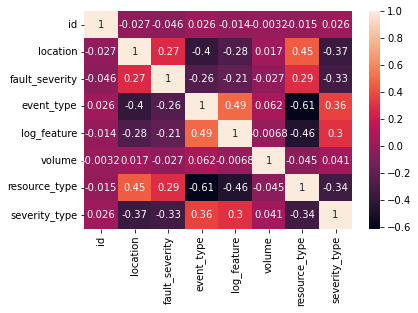

In [134]:
#Viewing correlation heat map
sns.heatmap(df.corr(), annot = True)

We can see that there are few feature pairings that have correlation value above 0.2. Fault severity and resource type are correlated with each other and with location. Log feature is highly correlated with event type and severity type. <br><br>
Based on this correlation, it is hypothesized that some location has higher or more frequent fault severity due to resource type. We will dive a little deeper through data exploration and visualizations below. 


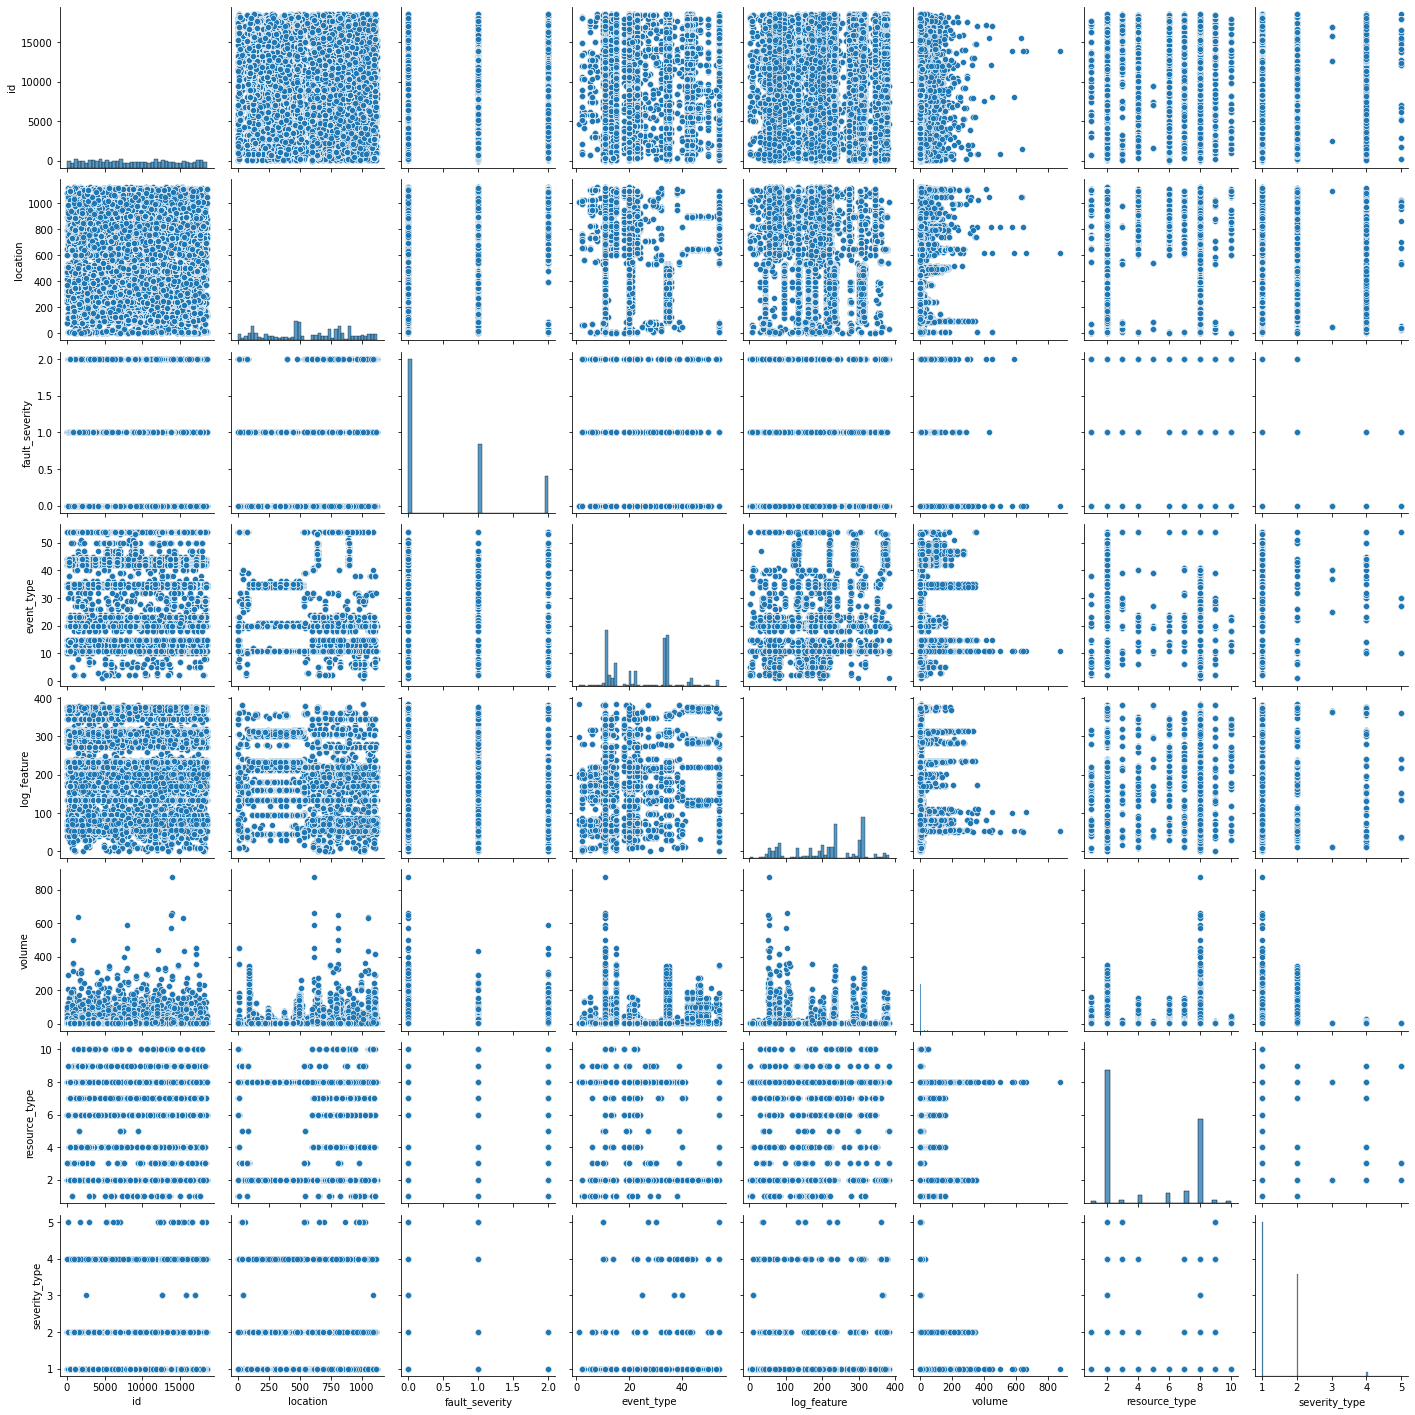

In [135]:
#Performing a pairplot for the data
sns.pairplot(df)

Most of the data is categorical (ordinal). Based on this pairplot, there are some noticeable trends. <br> 
-Resource type 8 has the highest number of volumes.<br>
-Most severity types are between severity type 1 and 2. <br>

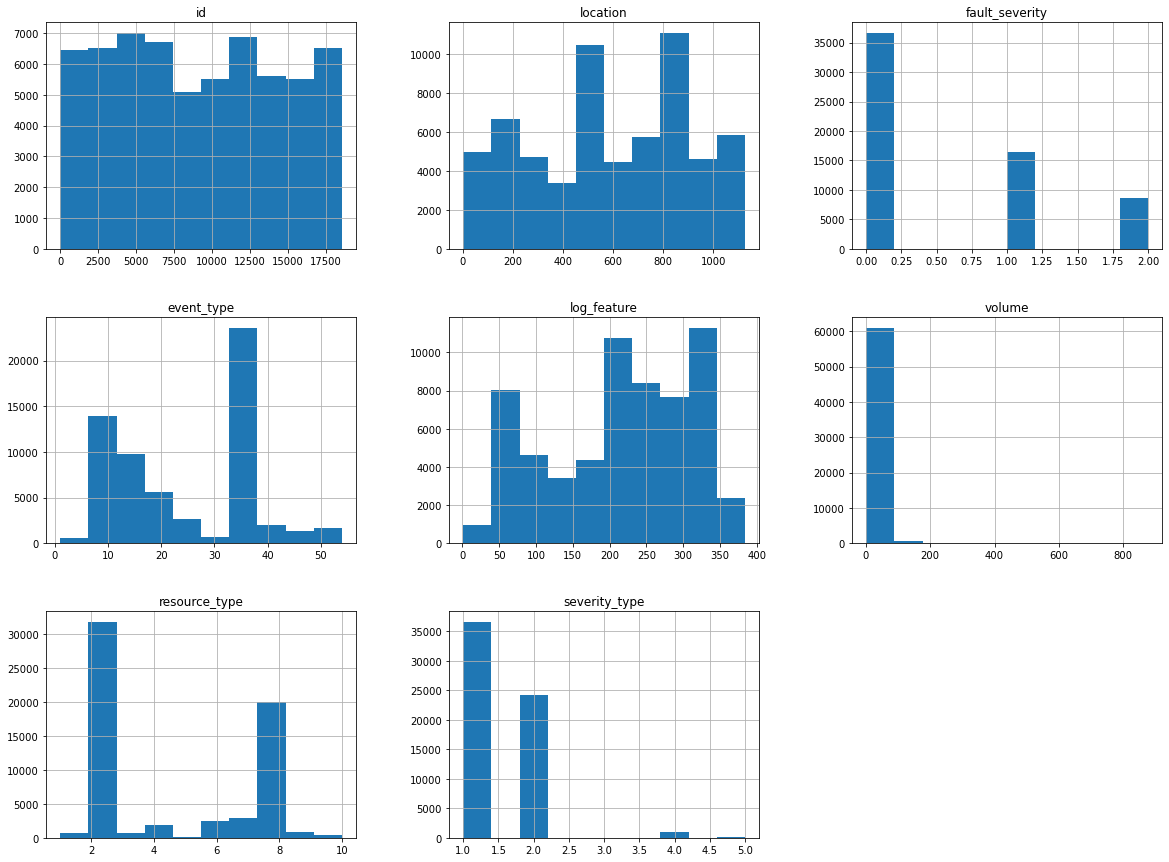

In [136]:
#Histograms of data
df.hist(figsize = (20,15));

The histograms show the distributions within each feature. <br>
-We can see that there are certain locations that were recorded more frequently than others, indicating that there are certain areas that may experience more downtime. <br>
-Most of the fault severity are clustered in the first group. <br>
-Most event types are type 35. <br>
-Most resource type are 2 and 8.

In [137]:
#Returning the dtypes for the features back into categories to prepare for sparse matrix
df[['event_type', 'resource_type', 'severity_type', 'log_feature']] = df[['event_type', 'resource_type', 'severity_type', 'log_feature']].astype('category')

In [138]:
#Counting number of unique fault severity for each id
fs_count = df.groupby(['id'])['fault_severity'].nunique().reset_index()
fs_count['fault_severity'].value_counts()

1    7381
Name: fault_severity, dtype: int64

In [139]:
#Getting sparse matrix for all attributes
X = pd.get_dummies(df, drop_first = True)
X.head()

,id,location,fault_severity,volume,event_type_2,event_type_3,event_type_5,event_type_6,event_type_7,event_type_8,...,resource_type_5,resource_type_6,resource_type_7,resource_type_8,resource_type_9,resource_type_10,severity_type_2,severity_type_3,severity_type_4,severity_type_5
0,14121,118,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14121,118,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14121,118,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,14121,118,1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9320,91,0,200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [140]:
#Split target 'fault_severity' from the rest of the dataframe to in order to prepare dataframe without affecting target
x, y = X.drop('fault_severity', axis = 1), X['fault_severity']

It seems that each ID has only 1 type of fault severity recorded even though there are different event, resource and severity types that may be recorded. 

In [141]:
#Group by ID and summing the rest of the attributes
# X = X.groupby('id').sum().reset_index()

In [142]:
#Viewing the shape of target and newly-grouped by dataframe
# print('shape of X: ', X.shape, 'shape of target: ', y.shape)

## Prediction

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [144]:
#Classification algorithms that will be evaluated for best model
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
log = LogisticRegression(solver='liblinear')
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 500)
gbc = GradientBoostingClassifier(learning_rate= 0.01, max_depth = 3, n_estimators = 500)

algorithms = [g, b, k, log, dtc, rfc, gbc]
names = ['Gaussian', 'Bernoulli', 
         'KNearest', 'Log', 'DecisionTreeClass', 
         'RandomForestClass', 'GradientBoostingClassifier']

In [145]:
# #Splitting target from the rest of dataframe for train-test-split
# y, x = df['fault_severity'], df.drop('fault_severity', axis = 1)

In [146]:
#Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=15)

In [147]:
#Shape of train and test sets
print(X_train.shape, X_test.shape)

(49471, 394) (12368, 394)


In [148]:
#Function to run algorithms with performance metrics
def classification():
    accuracy = []
    precision = []
    recall = []
    f1 =[]
    for i in range(len(algorithms)):
        algorithms[i].fit(X_train, y_train) 
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y_test, algorithms[i].predict(X_test)))
        precision.append(precision_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
        recall.append(recall_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
        f1.append(f1_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
    
    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [149]:
classification()

,Accuracy,Precision,Recall,F1
Gaussian,0.584735,0.547932,0.595320,0.512713
Bernoulli,0.616510,0.548446,0.588139,0.557476
KNearest,0.943483,0.933119,0.937235,0.935142
Log,0.622979,0.520749,0.436191,0.440071
DecisionTreeClass,0.951730,0.936795,0.943247,0.939944
RandomForestClass,0.789699,0.757098,0.747542,0.752005
GradientBoostingClassifier,0.698334,0.683298,0.552185,0.583579
